<a href="https://colab.research.google.com/github/Sab0507G/Ultrasound-Nerve-Segmentation-Using-Hybrid-Architecture/blob/main/Ultrasound_Nerve_Segmentation_using_Segnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

In [ ]:
import cv2
import keras
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
K.set_image_data_format('channels_last')  # TensorFlow dimension ordering


In [ ]:
img_rows, img_cols = 64, 80  # Resize dimensions
smooth = 1.

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
def get_segnet():
    inputs = Input((img_rows, img_cols, 1))

    # Encoder
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)

    # Decoder
    up4 = UpSampling2D((2, 2))(pool4)
    conv5 = Conv2D(512, (3, 3), padding='same')(up4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)

    up3 = UpSampling2D((2, 2))(conv5)
    conv6 = Conv2D(256, (3, 3), padding='same')(up3)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)

    up2 = UpSampling2D((2, 2))(conv6)
    conv7 = Conv2D(128, (3, 3), padding='same')(up2)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)

    up1 = UpSampling2D((2, 2))(conv7)
    conv8 = Conv2D(64, (3, 3), padding='same')(up1)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)

    conv9 = Conv2D(1, (1, 1), activation='sigmoid')(conv8)

    model = Model(inputs=inputs, outputs=conv9)
    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model


In [ ]:
def train_and_predict():
    print('Loading training data...')
    # Load training data here (replace with actual data loading logic)
    imgs_train = np.random.rand(100, img_rows, img_cols, 1)
    imgs_mask_train = np.random.rand(100, img_rows, img_cols, 1)


In [ ]:
def train_and_predict():
    print('Loading and preprocessing train data...')
    # Simulated dataset loading (replace with actual data)
    imgs_train = np.random.rand(100, img_rows, img_cols, 1)  # Dummy images
    imgs_mask_train = np.random.randint(0, 2, (100, img_rows, img_cols, 1))  # Dummy masks

    # These lines should be indented inside the function
    imgs_train = imgs_train.astype('float32')
    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.

    print('Creating and compiling model...') # This line and the following two should be indented to be inside the function
    model = get_unet()
    model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/segnet_model.h5', monitor='loss', save_best_only=True)

    # ... rest of your training and prediction logic ... # Add any remaining parts of the function here

In [ ]:
print('Creating and compiling model...')
model = get_segnet()

Creating and compiling model...


In [ ]:
checkpoint = ModelCheckpoint('segnet_colab.keras', monitor='loss', save_best_only=True)  # Changed extension to .keras
# or
checkpoint = ModelCheckpoint('segnet_colab.h5', monitor='loss', save_best_only=True)   # Changed extension to .h5

In [ ]:
# ... (Previous code remains unchanged) ...

# Call the function to create the model
model = get_segnet()

# Compile the model outside the function definition
model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

# ... (Rest of the code remains unchanged) ...

In [ ]:
def get_segnet():
    inputs = Input((img_rows, img_cols, 1))

    # ... (Rest of the model definition remains the same) ...

    model = Model(inputs=inputs, outputs=conv9)
    # Change 'lr' to 'learning_rate' in Adam optimizer
    model.compile(optimizer=Adam(learning_rate=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [ ]:
import tensorflow as tf  # Add this line to import tensorflow explicitly

# ... (Rest of the code) ...

def dice_coef(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)  # Change K.flatten to tf.keras.backend.flatten
    y_pred_f = tf.keras.backend.flatten(y_pred)  # Change K.flatten to tf.keras.backend.flatten
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)  # Change K.sum to tf.keras.backend.sum
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)  # Change K.sum to tf.keras.backend.sum

# ... (Rest of the code) ...

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - dice_coef: 0.0040 - loss: -0.0039
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - dice_coef: 0.0040 - loss: -0.0040
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - dice_coef: 0.0040 - loss: -0.0040
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - dice_coef: 0.0040 - loss: -0.0040


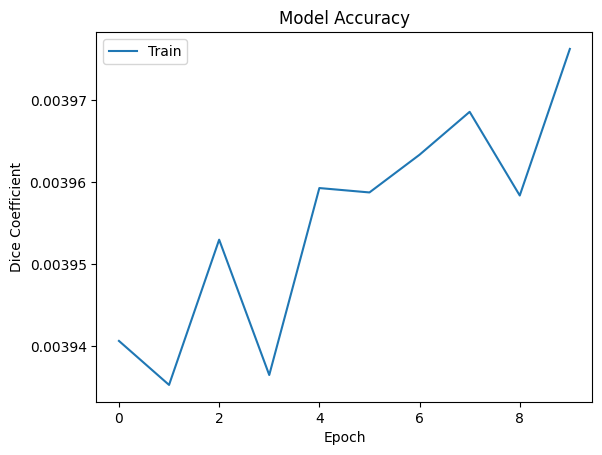

In [ ]:
# ... (Previous code remains unchanged) ...

# Call the function to create the model
model = get_segnet()

# Compile the model outside the function definition
model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

# Load and preprocess train data (replace with your actual data loading)
imgs_train = np.random.rand(100, img_rows, img_cols, 1)  # Dummy images
imgs_mask_train = np.random.randint(0, 2, (100, img_rows, img_cols, 1))  # Dummy masks

imgs_train = imgs_train.astype('float32')
imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.

# Fit the model and store the training history
history = model.fit(imgs_train, imgs_mask_train, epochs=10, batch_size=32)

# ... (Rest of the code remains unchanged) ...

# Plot accuracy & loss
plt.plot(history.history['dice_coef'])
plt.title('Model Accuracy')
plt.ylabel('Dice Coefficient')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('accuracy_plot.png')
plt.show()

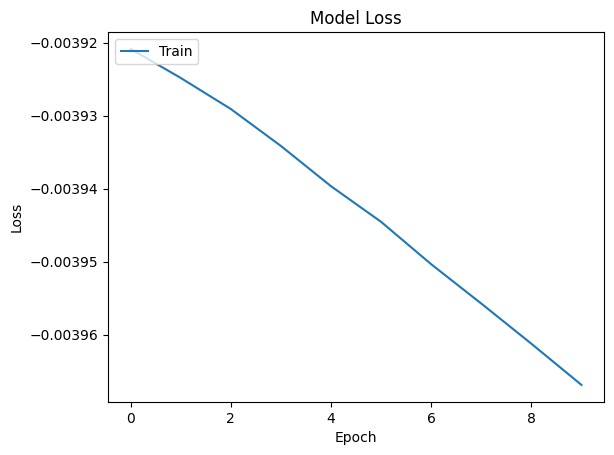

In [ ]:
# Plot accuracy & loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('loss_plot.png')
plt.show()


In [ ]:
print('Predicting on test data...')
imgs_test = np.random.rand(10, img_rows, img_cols, 1) # Removed the unexpected indentation
imgs_test = imgs_test.astype('float32') / 255.

Predicting on test data...


In [ ]:
imgs_mask_test = model.predict(imgs_test, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test) # Removed the extra indentation (4 spaces)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
if __name__ == '__main__':
    train_and_predict()

Loading and preprocessing train data...
Creating and compiling model...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - dice_coef: 0.0039 - loss: -0.0039  

3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - dice_coef: 0.0039 - loss: -0.0039 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 2/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - dice_coef: 0.0040 - loss: -0.0040

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - dice_coef: 0.0040 - loss: -0.0040 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 3/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - dice_coef: 0.0040 - loss: -0.0040

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - dice_coef: 0.0040 - loss: -0.0040 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 4/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - dice_coef: 0.0041 - loss: -0.0041 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - dice_coef: 0.0041 - loss: -0.0041 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 5/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - dice_coef: 0.0041 - loss: -0.0041 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - dice_coef: 0.0041 - loss: -0.0041 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 6/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - dice_coef: 0.0042 - loss: -0.0042

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - dice_coef: 0.0042 - loss: -0.0042 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 7/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - dice_coef: 0.0042 - loss: -0.0042 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - dice_coef: 0.0042 - loss: -0.0042 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 8/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - dice_coef: 0.0042 - loss: -0.0042 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - dice_coef: 0.0042 - loss: -0.0042 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 9/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - dice_coef: 0.0043 - loss: -0.0043 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - dice_coef: 0.0043 - loss: -0.0043 - val_dice_coef: 0.0039 - val_loss: -0.0039
Epoch 10/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - dice_coef: 0.0043 - loss: -0.0043 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - dice_coef: 0.0043 - loss: -0.0043 - val_dice_coef: 0.0039 - val_loss: -0.0039
